**Nicolas Sholten**

**Valentin Portillo**

# UE Deep learning -- Lab session 5
Pierre-Henri Conze, François Rousseau

### Objectives: perform classification on Fashion-MNIST dataset using multiple layer perceptrons, convolutional neural networks, data augmentation and transfer learning to obtain the best classification results as possible!

First, download and read the Fashion-MNIST data.

In [0]:
%matplotlib inline
import keras
from keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Part 1 - Data management and visualization

#### 1) Fashion-MNIST is a dataset consisting of a training set of A examples and a test set of B examples. Each example is a CxC grayscale image, associated with a label from D classes. What are the values for A, B, C and D?

In [0]:
# to do
train_size = x_train.shape[0]
test_size = x_test.shape[0]
img_shape = ( x_train.shape[1], x_train.shape[1])
classes = np.unique(y_train)
print(f'A: {train_size}, B: {test_size}, CxC: {img_shape}, D: {classes}')

A: 60000, B: 10000, CxC: (28, 28), D: [0 1 2 3 4 5 6 7 8 9]


Each training/test sample is assigned to one of the following labels: 
0	T-shirt
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [0]:
num_classes = len(classes)
class_names = ['tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

#### 2) Visualize one example per class among the training dataset:

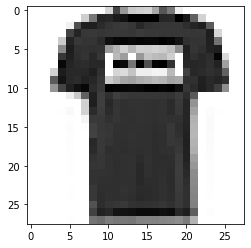

In [0]:
import matplotlib.pyplot as plt
import operator

def visualizeExample(n, x):
    plt.imshow(x[n].reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
    plt.clf(); plt.close();
    
visualizeExample(1, x_train)

Image of a tshirt


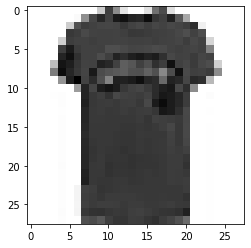

Image of a trouser


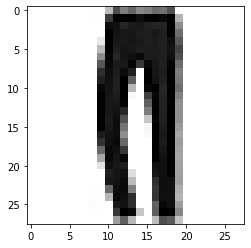

Image of a pullover


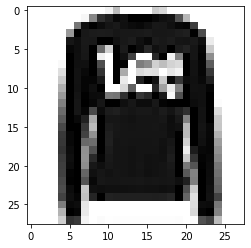

Image of a dress


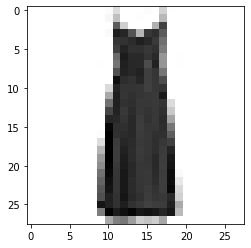

Image of a coat


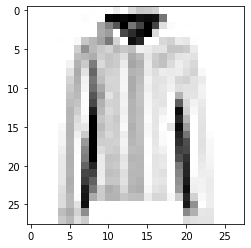

Image of a sandal


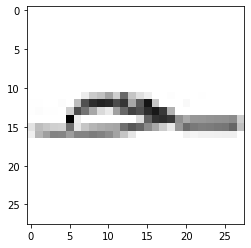

Image of a shirt


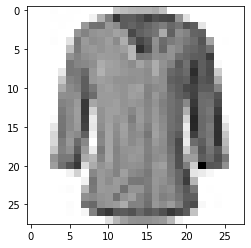

Image of a sneaker


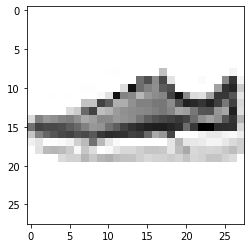

Image of a bag


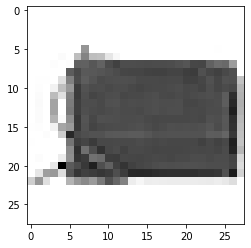

Image of a boot


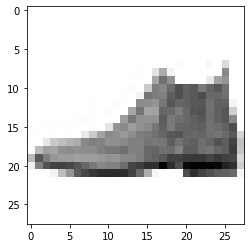

In [0]:
# Print all classes
for i, cla in enumerate(classes):
    matches = np.where(y_test == cla)
    print(f'Image of a { class_names[cla] }')
    visualizeExample(matches[0][0], x_test)

### Part 2 - Multi-layer perceptrons

#### 3) Define a simple Keras multi-layer perceptron (MLP) architecture using Sequential API and containing 3 dense layers: 2 dense layers with 512 units and ReLU activation followed by 1 dense layer for softmax regression. Use your model to get first classification results on Fashion MNIST.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [0]:
# build 4D tensors
"""x_train = x_train.reshape(train_size, img_shape[0], img_shape[1], 1)
x_test = x_test.reshape(test_size, img_shape[0], img_shape[1], 1)"""
x_train = np.reshape(x_train, (train_size, img_shape[0]*img_shape[1]))
x_test = np.reshape(x_test, (test_size, img_shape[0]*img_shape[1]))
# data normalization
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
# convert class vectors to binary class matrices
z_train = keras.utils.to_categorical(y_train, num_classes)
z_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
units = 512
mlp_1 = Sequential()

mlp_1.add(Dense(units=units, activation='relu', input_shape=(img_shape[0] * img_shape[1],)))
mlp_1.add(Dense(units=units, activation='relu'))
mlp_1.add(Dense(units=num_classes, activation='softmax'))
mlp_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
batch_size = 128
epochs = 30

mlp_1.compile(RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

hist_mlp_1=mlp_1.fit(
    x=x_train, 
    y=z_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=2, 
    validation_data=(x_test, z_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 8s - loss: 0.5385 - acc: 0.8039 - val_loss: 0.4169 - val_acc: 0.8469
Epoch 2/30
 - 8s - loss: 0.3761 - acc: 0.8615 - val_loss: 0.4104 - val_acc: 0.8556
Epoch 3/30
 - 7s - loss: 0.3331 - acc: 0.8772 - val_loss: 0.3924 - val_acc: 0.8607
Epoch 4/30
 - 7s - loss: 0.3083 - acc: 0.8869 - val_loss: 0.3608 - val_acc: 0.8775
Epoch 5/30
 - 7s - loss: 0.2922 - acc: 0.8918 - val_loss: 0.3837 - val_acc: 0.8684
Epoch 6/30
 - 7s - loss: 0.2772 - acc: 0.8967 - val_loss: 0.3593 - val_acc: 0.8706
Epoch 7/30
 - 7s - loss: 0.2677 - acc: 0.9012 - val_loss: 0.3816 - val_acc: 0.8765
Epoch 8/30
 - 7s - loss: 0.2586 - acc: 0.9049 - val_loss: 0.4289 - val_acc: 0.8656
Epoch 9/30
 - 7s - loss: 0.2486 - acc: 0.9085 - val_loss: 0.3673 - val_acc: 0.8802
Epoch 10/30
 - 7s - loss: 0.2402 - acc: 0.9122 - val_loss: 0.4014 - val_acc: 0.8792
Epoch 11/30
 - 7s - loss: 0.2353 - acc: 0.9133 - val_loss: 0.4044 - val_acc: 0.8814
Epoch 12/30
 - 7s - loss: 0.2277 - 

#### 4) Define a generic function evaluate_model() able to:
- plot the evolution of accuracy for both training and testing data with respect to the epochs
- compute final test loss and accuracy. 

Use this function to assess the performance of the previously defined model.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


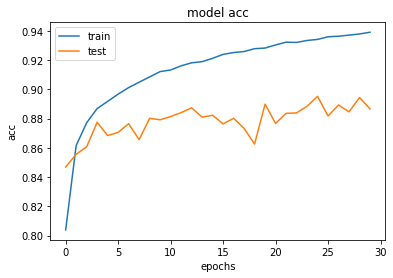

Test loss: 0.5287403431087733
Test accuracy: 0.8866


In [0]:
def evaluate_model(model,history):
    print(history.history.keys())

    #Visualize history (loss vs epochs)
    plt.figure()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model acc')
    plt.ylabel('acc')  
    plt.xlabel('epochs')
    plt.legend(['train','test'], loc='upper left')
    plt.show(), plt.clf(); plt.close()

    score = model.evaluate(x_test, z_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

evaluate_model(mlp_1, hist_mlp_1)

Comments: **Here we can see that the accuracy increases continuously and the test verification has a very steady behavior which means that we don't have overfitting (apparently). So, we could continue "improving" the prediction by doing more epochs but the fact that the test accuracy remains steady means that for new data our model is likely to not perform well even if the training set is each time better. Thus, maybe we could remain with the model trained until the first epochs to have a more general model, let's say the 11th epoch (before the big collapse at the 18th epoch).**

#### 5) Define a deeper multi-layer perceptron (MLP) architecture to outperform the previously obtained classification results. 
Use evaluate_model() to provide the evaluation and comment the performance.

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 20s - loss: 0.5763 - acc: 0.7944 - val_loss: 0.4663 - val_acc: 0.8278
Epoch 2/20
 - 19s - loss: 0.3921 - acc: 0.8546 - val_loss: 0.4605 - val_acc: 0.8363
Epoch 3/20
 - 19s - loss: 0.3531 - acc: 0.8708 - val_loss: 0.4485 - val_acc: 0.8389
Epoch 4/20
 - 19s - loss: 0.3265 - acc: 0.8806 - val_loss: 0.3881 - val_acc: 0.8694
Epoch 5/20
 - 19s - loss: 0.3113 - acc: 0.8862 - val_loss: 0.3782 - val_acc: 0.8666
Epoch 6/20
 - 19s - loss: 0.2992 - acc: 0.8910 - val_loss: 0.3738 - val_acc: 0.8730
Epoch 7/20
 - 19s - loss: 0.2883 - acc: 0.8948 - val_loss: 0.3817 - val_acc: 0.8762
Epoch 8/20
 - 19s - loss: 0.2807 - acc: 0.8995 - val_loss: 0.3993 - val_acc: 0.8837
Epoch 9/20
 - 19s - loss: 0.2740 - acc: 0.9015 - val_loss: 0.3843 - val_acc: 0.8818
Epoch 10/20
 - 19s - loss: 0.2643 - acc: 0.9042 - val_loss: 0.3965 - val_acc: 0.8785
Epoch 11/20
 - 19s - loss: 0.2587 - acc: 0.9061 - val_loss: 0.4299 - val_acc: 0.8673
Epoch 12/20
 - 19s - los

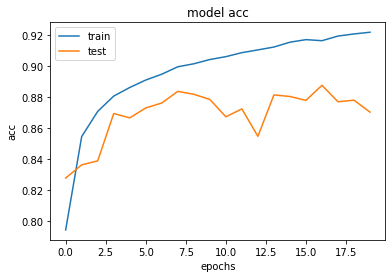

Test loss: 0.5331069358229638
Test accuracy: 0.8703


In [0]:
batch_size = 128
epochs = 20

# mdodel
units = 1028
mlp_2 = Sequential()
mlp_2.add(Dense(units=units, activation='relu', input_shape=(img_shape[0] * img_shape[1],)))
mlp_2.add(Dense(units=units, activation='relu'))
mlp_2.add(Dense(units=num_classes, activation='softmax'))
mlp_2.summary()

# metrics and loss 
mlp_2.compile(RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Run
hist_mlp_2=mlp_2.fit(
    x=x_train, 
    y=z_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=2, 
    validation_data=(x_test, z_test))

evaluate_model(mlp_2,hist_mlp_2)

In [0]:
mlp_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1028)              806980    
_________________________________________________________________
dense_11 (Dense)             (None, 1028)              1057812   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10290     
Total params: 1,875,082
Trainable params: 1,875,082
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 6s - loss: 0.6189 - acc: 0.7713 - val_loss: 0.6356 - val_acc: 0.7710
Epoch 2/20
 - 5s - loss: 0.4186 - acc: 0.8461 - val_loss: 0.4189 - val_acc: 0.8426
Epoch 3/20
 - 5s - loss: 0.3708 - acc: 0.8639 - val_loss: 0.4022 - val_acc: 0.8620
Epoch 4/20
 - 5s - loss: 0.3545 - acc: 0.8723 - val_loss: 0.3871 - val_acc: 0.8655
Epoch 5/20
 - 5s - loss: 0.3398 - acc: 0.8740 - val_loss: 0.3873 - val_acc: 0.8654
Epoch 6/20
 - 5s - loss: 0.3367 - acc: 0.8783 - val_loss: 0.4396 - val_acc: 0.8492
Epoch 7/20
 - 5s - loss: 0.3308 - acc: 0.8810 - val_loss: 0.5239 - val_acc: 0.8170
Epoch 8/20
 - 5s - loss: 0.3251 - acc: 0.8839 - val_loss: 0.4135 - val_acc: 0.8585
Epoch 9/20
 - 5s - loss: 0.3188 - acc: 0.8860 - val_loss: 0.3868 - val_acc: 0.8650
Epoch 10/20
 - 5s - loss: 0.3189 - acc: 0.8878 - val_loss: 0.3962 - val_acc: 0.8663
Epoch 11/20
 - 5s - loss: 0.3117 - acc: 0.8891 - val_loss: 0.3774 - val_acc: 0.8743
Epoch 12/20
 - 5s - loss: 0.3061 - 

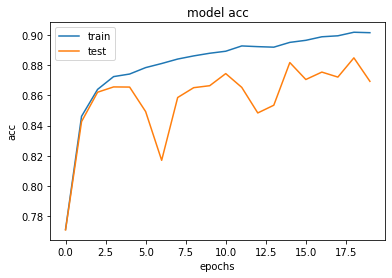

Test loss: 0.4763325689315796
Test accuracy: 0.8692


In [0]:
batch_size = 128
epochs = 20

# mdodel
units = 256
mlp_3 = Sequential()
mlp_3.add(Dense(units=units, activation='relu', input_shape=(img_shape[0] * img_shape[1],)))
mlp_3.add(Dense(units=units, activation='relu'))
mlp_3.add(Dense(units=units, activation='relu'))
mlp_3.add(Dense(units=units, activation='relu'))
mlp_3.add(Dense(units=num_classes, activation='softmax'))
mlp_3.summary()

# metrics and loss 
mlp_3.compile(RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Run
hist_mlp_3=mlp_3.fit(
    x=x_train, 
    y=z_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=2, 
    validation_data=(x_test, z_test))

evaluate_model(mlp_3,hist_mlp_3)

In [0]:
mlp_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 400,906
Trainable params: 400,906
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_29 (Dense)             (None, 10)               

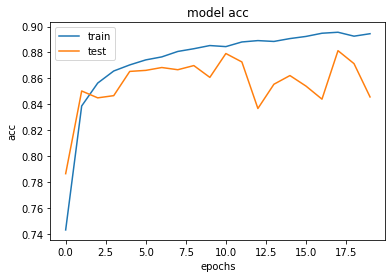

Test loss: 0.5269387719392776
Test accuracy: 0.8457


In [0]:
batch_size = 128
epochs = 20

# mdodel
units = 512
mlp_4 = Sequential()
mlp_4.add(Dense(units=units, activation='relu', input_shape=(img_shape[0] * img_shape[1],)))
mlp_4.add(Dense(units=units, activation='relu'))
mlp_4.add(Dense(units=units, activation='relu'))
mlp_4.add(Dense(units=units, activation='relu'))
mlp_4.add(Dense(units=units, activation='relu'))
mlp_4.add(Dense(units=units, activation='relu'))
mlp_4.add(Dense(units=num_classes, activation='softmax'))
mlp_4.summary()

# metrics and loss 
mlp_4.compile(RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Run
hist_mlp_4=mlp_4.fit( MaxPooling2D
    x=x_train, 
    y=z_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=2, 
    validation_data=(x_test, z_test))

evaluate_model(mlp_4,hist_mlp_4)

Conclusion: We changed the configuration regarding quantity of hiden layers, neurons but still didn't got any improvement.

### Part 3 - Convolutional neural networks

##### 6) Define a simple Keras convolutional neural network (CNN) architecture using Sequential API and containing the following layers : 1 convolution layer using Conv2D and 32 filters, 1 max-polling layer using MaxPooling2D, 2 dense layers using ReLU and softmax activations respectively. Use this model to get classification results (use evaluate_model() as previously) and compared them to MLP results. 

In [0]:
x_train = np.reshape(x_train, (train_size, img_shape[0], img_shape[1], 1))
x_test = np.reshape(x_test, (test_size, img_shape[0], img_shape[1], 1))
# data normalization
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
# convert class vectors to binary class matrices
z_train = keras.utils.to_categorical(y_train, num_classes)
z_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 25s - loss: 1.5088 - acc: 0.5252 - val_loss: 0.91

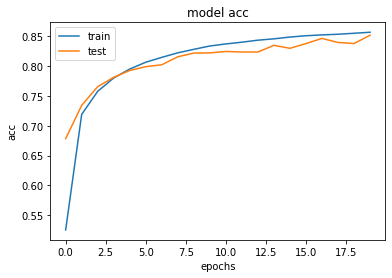

Test loss: 0.43208588263988496
Test accuracy: 0.8517


In [0]:
batch_size = 128
epochs = 20
input_shape=(img_shape[0], img_shape[1], 1)

cnn_1 = Sequential()
cnn_1.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), activation='relu', input_shape=input_shape))
cnn_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_1.add(Flatten())
cnn_1.add(Dense(units=128, activation='relu'))
cnn_1.add(Dense(units=10, activation='softmax'))
cnn_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_1.summary()
hist_cnn_1 = cnn_1.fit(x=x_train, y=z_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_test, z_test))
evaluate_model(cnn_1, hist_cnn_1)

Comments: **The behavior of the increasing accuracy is different from the dense layers network because both acuracies, training and test increase together. Because of the computer power we are not able to do more epochs (working in colab) but it would be the path to follow to see if we get a bigger accuracy.**


#### 7) As for MLP, define a deeper CNN architecture to outperform the previously obtained classification results. What are your conclusions?

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               4719104   
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 10)              

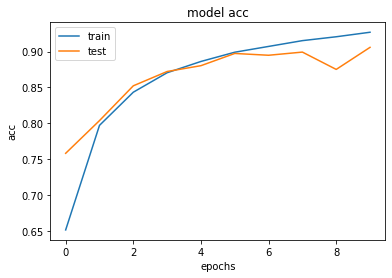

Test loss: 0.2776282888352871
Test accuracy: 0.9058


In [0]:
batch_size = 128
epochs = 10
input_shape=(img_shape[0], img_shape[1], 1)

cnn_2 = Sequential()
cnn_2.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), activation='relu', input_shape=input_shape))
cnn_2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_2.add(Flatten())
cnn_2.add(Dense(units=512, activation='relu'))
cnn_2.add(Dense(units=512, activation='relu'))
cnn_2.add(Dense(units=10, activation='softmax'))
cnn_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_2.summary()
hist_cnn_2 = cnn_2.fit(x=x_train, y=z_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_test, z_test))
evaluate_model(cnn_2, hist_cnn_2)

Comments: **For CNNs, working with images, deeper is a synonym of increasing accuracy, contrary to Dense Networks.**

### Part 4 - Visualize wrongly predictions

#### 8) Create a function visualize_wrongly_predictions() able to show wrong prediction for each class for a given model as input. Use this function for each of the 4 previouly trained models (2 MLP, 2 CNN).

In [0]:

import operator
def visualize_wrongly_predictions(model, n, x, z, to_print=True):
    predictions = model.predict(x)
    incorrect = []; y_pred = []
    for i, pred in enumerate(predictions):
        index, _ = max(enumerate(pred), key=operator.itemgetter(1))
        index_test, _ = max(enumerate(z[i]), key=operator.itemgetter(1))
        if index != index_test: incorrect.append(i)
        y_pred.append(index)

    if to_print:
      index, _ = max(enumerate(predictions[incorrect[n]]), key=operator.itemgetter(1))
      index_test, _ = max(enumerate(z[incorrect[n]]), key=operator.itemgetter(1))
      plt.imshow(x[incorrect[n]].reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
      plt.show()
      print(f"expected {index_test}, obtained {index}, from { round( 100 * len(incorrect) / len(z) ) }% wrong predictions")
    
    return y_pred

In [0]:
def classErrors(model, x, y):
    predictions = model.predict(x)
    total_classes = { cla: 0 for i, cla in enumerate(classes) }
    total_errors = { cla: 0 for i, cla in enumerate(classes) }
    cnt = 0; eq = 0
    for i, pred in enumerate(predictions):
        index, _ = max(enumerate(pred), key=operator.itemgetter(1))
        index_test = y[i]
        total_classes[index_test] += 1
        if int(index) != int(index_test): total_errors[index_test] += 1

    for cla, tot in total_classes.items():
        print(f'class {cla} has { round(100*total_errors[cla] / total_classes[cla])}% of errors')

In [0]:
x_train = np.reshape(x_train, (train_size, img_shape[0]*img_shape[1]))
x_test = np.reshape(x_test, (test_size, img_shape[0]*img_shape[1]))

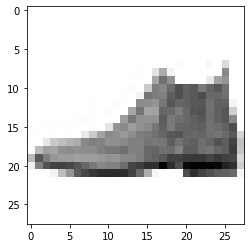

expected 9, obtained 6, from 90% wrong predictions
class 0 has 100% of errors
class 1 has 100% of errors
class 2 has 100% of errors
class 3 has 100% of errors
class 4 has 100% of errors
class 5 has 100% of errors
class 6 has 0% of errors
class 7 has 100% of errors
class 8 has 100% of errors
class 9 has 100% of errors


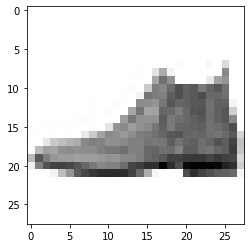

expected 9, obtained 5, from 83% wrong predictions
class 0 has 27% of errors
class 1 has 100% of errors
class 2 has 100% of errors
class 3 has 100% of errors
class 4 has 100% of errors
class 5 has 0% of errors
class 6 has 100% of errors
class 7 has 100% of errors
class 8 has 100% of errors
class 9 has 100% of errors


In [0]:
v = visualize_wrongly_predictions(mlp_1, 0, x_test, z_test)
classErrors(mlp_1, x_test, y_test)
v = visualize_wrongly_predictions(mlp_4, 0, x_test, z_test)
classErrors(mlp_4, x_test, y_test)

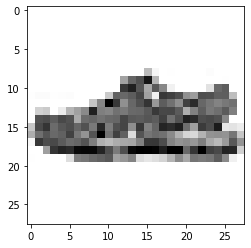

expected 5, obtained 7, from 15% wrong predictions
class 0 has 21% of errors
class 1 has 5% of errors
class 2 has 28% of errors
class 3 has 14% of errors
class 4 has 21% of errors
class 5 has 7% of errors
class 6 has 38% of errors
class 7 has 6% of errors
class 8 has 5% of errors
class 9 has 4% of errors


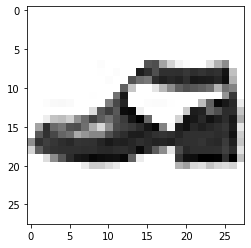

expected 9, obtained 5, from 9% wrong predictions
class 0 has 9% of errors
class 1 has 2% of errors
class 2 has 12% of errors
class 3 has 8% of errors
class 4 has 16% of errors
class 5 has 3% of errors
class 6 has 37% of errors
class 7 has 2% of errors
class 8 has 2% of errors
class 9 has 4% of errors


In [0]:
x_train = np.reshape(x_train, (train_size, img_shape[0], img_shape[1], 1))
x_test = np.reshape(x_test, (test_size, img_shape[0], img_shape[1], 1))
v= visualize_wrongly_predictions(cnn_1, 0,  x_test, z_test)
classErrors(cnn_1, x_test, y_test)
v= visualize_wrongly_predictions(cnn_2, 0,  x_test, z_test)
classErrors(cnn_2, x_test, y_test)

Comments: **Evidently, we can see that it works a lot better with the CNN model, we made a 80% improvement.** 
**The Dense network somehow specialized in the items because it detects well some of the classes but not at all other classes**

#### 9) Using the code given below, create a function visualize_confusion_matrix() able to display the confusion matrix  for a given model as input. Use this function for each of the 4 previouly trained models (2 MLP, 2 CNN). What is the most common confusion?

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
def visualize_confusion_matrix(model, y, x, z):
    # Compute confusion matrix
    y_pred=visualize_wrongly_predictions(model, 0, x, z, False)
    cnf_matrix = confusion_matrix(y, y_pred)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

    plt.show()

Normalized confusion matrix


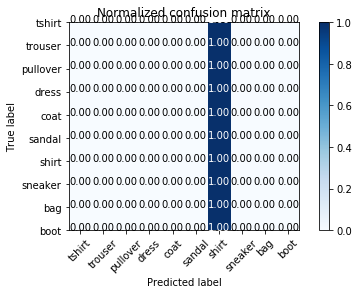

Normalized confusion matrix


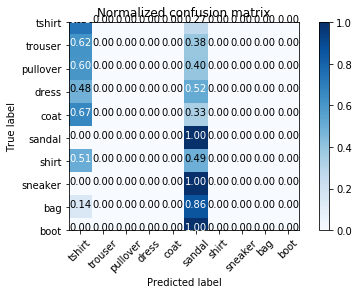

In [0]:
x_test = np.reshape(x_test, (test_size, img_shape[0]*img_shape[1]))
visualize_confusion_matrix(mlp_1, y_test, x_test, z_test)
visualize_confusion_matrix(mlp_4, y_test, x_test, z_test)

Normalized confusion matrix


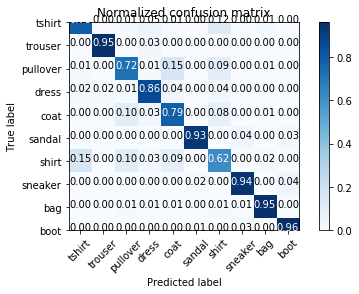

Normalized confusion matrix


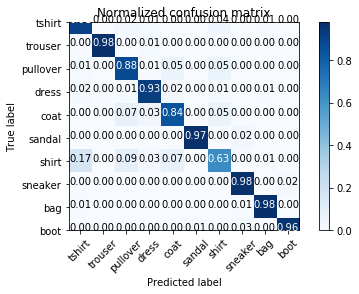

In [0]:
x_test = np.reshape(x_test, (test_size, img_shape[0], img_shape[1], 1))
visualize_confusion_matrix(cnn_1, y_test, x_test, z_test)
visualize_confusion_matrix(cnn_2, y_test, x_test, z_test)

Most common confusion: **the most common confusion is the shirt for the tshirt which is to be expected**

Conclusion: **For the case of the purely dense layers, they hardly identify features of the items.** 

### Part 5 - Data augmentation

#### 10) Based on the documentation (https://keras.io/preprocessing/image/), train one of your CNN architecture using data augmentation and conclude on the used of augmented data.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    height_shift_range=0.08,
    shear_range=0.3, 
    zoom_range=0.08)


In [0]:
datagen.fit(x_train)

In [0]:
cnn_2.fit_generator(datagen.flow(x_train, z_train, batch_size=128),
                    steps_per_epoch=len(x_train) / 128, epochs=2)

Epoch 1/2
469/468 [==============================] - 197s 420ms/step - loss: 0.3666 - acc: 0.8624
Epoch 2/2
469/468 [==============================] - 196s 419ms/step - loss: 0.3528 - acc: 0.8688


Comments: **The accuracy of the already trained network decreases because the images that are being introduced are a little bit different form the previous ones so it has to learn the new organization of features. Even if the accuracy doesn't reach the "original" network accuracy, the resulting model would be better since it would be more generalized and so, could handle a more important quantity of cases. **

### Part 6 - Transfer learning from VGG16 trained on ImageNet

Transfer learning, is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.

In this part, you will do fine tuning on a pre-trained network. Fine-tuning consists in starting from a trained network, then re-training it on a new dataset using very small weight updates. To do so, you need to load a pre-trained model, add a dense classifier to compute the output, and then to freeze the weights of the pre-trained model (https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html).   

#### 11) Exploit an architecture already trained on ImageNet (https://keras.io/applications) to improve the classification results on Fashion-MNIST.

In [0]:
from keras import applications
from keras.models import Model
from skimage.transform import resize
import numpy as np
from PIL import Image


base_model = applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))

x = base_model.output
x = Flatten()(x)
# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(10, activation='softmax')(x)

mvgg = Model(inputs=base_model.input, outputs=predictions)

mvgg.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [0]:
x_train_r = [ resize(x_train[i], output_shape=(32,32,3)) for i in range(train_size) ]
x_test_r = [ resize(x_test[i], output_shape=(32,32,3)) for i in range(test_size) ]
x_train_r = np.array(x_train_r)
x_test_r = np.array(x_test_r)

In [0]:

mvgg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

hist_mvgg = mvgg.fit(x=x_train_r, y=z_train, batch_size=batch_size, epochs=2, verbose=2, validation_data=(x_test_r, z_test))
evaluate_model(mvgg, hist_mvgg)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2


KeyboardInterrupt: ignored

Conclusion: **The model did no go further than the printed "Epoch 1/2" seen, made 2 tests, each 10 minutes. It may be the available resources in colab.** 

#### 12) Challenge: the first 3 teams in terms of overall test accuracy results (whatever the methodology used) will obtain bonus points!

Best accuracy reached: **0.9085**


Conclusions: **Even with the difficulties with the available computer power, we understand a little bit more what has been read. It's difficult to get a sens of how many layers or how many neurons to include in our network but the principal idea of "deeper is better", "don't overfit" and "each architecture zorks for certain problems" has been understood. We put in practice the fact that a CNN can be inmproved by scaling and rotating the images and the tuning tecnique of using already existing trained networks to generalise and include more cases to the training modeling the network.**